<a href="https://colab.research.google.com/github/sloaneeliza/RecommenderSys/blob/main/AIFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
import pandas as pd
import os

# Trending Youtube Video Dataset From Kaggle
# Download latest version
path = kagglehub.dataset_download("datasnaek/youtube-new")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/datasnaek/youtube-new/versions/115


In [ ]:
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['US_category_id.json', 'MX_category_id.json', 'RU_category_id.json', 'GBvideos.csv', 'FR_category_id.json', 'CA_category_id.json', 'MXvideos.csv', 'RUvideos.csv', 'INvideos.csv', 'JP_category_id.json', 'JPvideos.csv', 'KR_category_id.json', 'USvideos.csv', 'DE_category_id.json', 'KRvideos.csv', 'FRvideos.csv', 'CAvideos.csv', 'IN_category_id.json', 'DEvideos.csv', 'GB_category_id.json']


In [ ]:
file_to_load = os.path.join(path, 'USvideos.csv')
if 'USvideos.csv' in files:
    data = pd.read_csv(file_to_load)
    print(data.head())
else:
    print("The expected file 'USvideos.csv' is not in the dataset.")

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   lik

In [ ]:
# Preprocessing

import pandas as pd
import string
from nltk.corpus import stopwords
import nltk

#download stopwords - Jessica
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


#load the CSV file
"""
file_path = '/content/USvideos.csv'    #we realized with using the kagglehub import that we do not
data = pd.read_csv(file_path)          #need to import our dataset, but instead, use kagglehub to download the dataset - Sloane, Jessica, Persabella
"""

#Preprocessing function, removes punctuations and stopwords from our video titles - Sloane
def preprocess_text_simple(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

#set preprocessing to the 'title' column of our csv file & remove duplications - Jessica
data['title_preprocessed'] = data['title'].apply(preprocess_text_simple)
data = data.drop_duplicates(subset='title', keep='first')

print(data[['title', 'title_preprocessed']].head())   #preview


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1  The Trump Presidency: Last Week Tonight with J...   
2  Racist Superman | Rudy Mancuso, King Bach & Le...   
3                   Nickelback Lyrics: Real or Fake?   
4                           I Dare You: GOING BALD!?   

                                  title_preprocessed  
0                             [want, talk, marriage]  
1  [trump, presidency, last, week, tonight, john,...  
2  [racist, superman, rudy, mancuso, king, bach, ...  
3                   [nickelback, lyrics, real, fake]  
4                                [dare, going, bald]  


In [ ]:
# ML recommender system using cosine similarity
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

# Load data - Jessica
data['title_preprocessed'] = data['title'].apply(preprocess_text_simple)
data = data.drop_duplicates(subset='title', keep='first')

# Vectorizing - Jessica
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(data['title_preprocessed'].apply(lambda x: ' '.join(x)))

# Cosine similarity between the titles - Jessica
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function for ML model - Jessica
def recommend_videos_by_title(video_index, num_recommendations=10):
    # Get similarity scores for the video
    sim_scores = list(enumerate(cosine_sim[video_index]))
    # Sort videos by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the indices of the most similar videos
    sim_scores = sim_scores[1:num_recommendations + 1]
    # Video details
    video_indices = [i[0] for i in sim_scores]
    recommendations = data.iloc[video_indices][['title', 'views']].copy()
    # recommendations['similarity_score'] = [i[1] for i in sim_scores]
    recommendations['similarity_score'] = [sim_scores[i][1] for i in range(len(sim_scores))]
    recommendations = recommendations[['title', 'views', 'similarity_score']]
    return recommendations

# Top 10 recommendations for random video chosen - Jessica & Persabella
random_video_index = random.randint(0, len(data) - 1)
print("ML Recommendations for:", data.iloc[random_video_index]['title'])

num_recommendations = 10
recommendations = recommend_videos_by_title(random_video_index, num_recommendations)
ml_recommendations = recommend_videos_by_title(random_video_index)
print(ml_recommendations)

# Takes the data & the # of recommendations as input using the videos with the highest view
# counts & returns a DataFrame contianing the titles and view counts - Persabella
def recommend_popular_videos(data, num_recommendations=10):
    return data.nlargest(num_recommendations, 'views')[['title', 'views']]




ML Recommendations for: YOUTUBERS REACT TO THEIR OLD YOUTUBE CHANNEL PROFILE #2
                                                   title    views  \
5200              YOUTUBERS REACT TO YOUTUBE REWIND 2017  2707816   
7803    YOUTUBERS REACT TO TOP 10 YOUTUBE VIDEOS OF 2017   814603   
37554           YOUTUBERS REACT TO THIS IS AMERICA MEMES  1191434   
6200          YOUTUBERS REACT TO INVISIBLE BOX CHALLENGE   737557   
20782  YouTube Has Now Frozen The Alex Jones Channel,...   100457   
26388  REACTING TO MY LITTLE SISTERS YOUTUBE CHANNEL ...   918558   
29153               YOUTUBERS REACT TO WALMART YODEL BOY  2969842   
6808   YOUTUBERS REACT TO TOP 10 VEVO CHANNELS OF ALL...  1337780   
28550                      Coachella 2018 LIVE Channel 1  3598220   
24159  COLLEGE KIDS REACT TO TOP 10 MOST SUBSCRIBED Y...  2164758   

       similarity_score  
5200           0.491795  
7803           0.467913  
37554          0.347401  
6200           0.334141  
20782          0.305742  
2638

In [ ]:
# New NN Model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Flatten, Concatenate
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder, normalize # Import normalize here
import random

#preparing the data that we preprocessed in our previous Preprocessing cell - Sloane & Persabella
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['title_preprocessed'])
data['title_seq'] = tokenizer.texts_to_sequences(data['title_preprocessed'])

max_sequence_length = max(data['title_seq'].apply(len))
data['title_seq'] = tf.keras.preprocessing.sequence.pad_sequences(data['title_seq'], maxlen=max_sequence_length, padding='post').tolist()

numerical_features = ['views', 'likes', 'dislikes', 'comment_count']  # Example features
X_numerical = data[numerical_features].values
X_text = np.array(data['title_seq'].tolist())
y = LabelEncoder().fit_transform(data['category_id'])  # Encode categories as integers

#Train/test split
X_train_num, X_test_num, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_numerical, X_text, y, test_size=0.2)

#Define NN model - Persabella
numerical_input = Input(shape=(len(numerical_features),), name='Numerical_Input')
text_input = Input(shape=(max_sequence_length,), name='Text_Input')

#Embedding layer - Persabella
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
text_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length)(text_input)

#LSTM layer
text_lstm = LSTM(64)(text_embedding)

#Dense layers for numerical featuresc - Persabella
dense_numerical = Dense(64, activation='relu')(numerical_input)

#Merge inputs - Persabella
merged = Concatenate()([text_lstm, dense_numerical])
hidden = Dense(128, activation='relu')(merged)
output = Dense(len(set(y)), activation='softmax')(hidden)

#compile the model
model = Model(inputs=[numerical_input, text_input], outputs=output)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#train the model -Persabella
history = model.fit(
    [X_train_num, X_train_text], y_train,
    validation_split=0.1,
    epochs=5,             #changed epoch from 10 to 5 to help with overfitting - Sloane, Jessica
    batch_size=32
)

#creates embeddings for a video's title - Sloane
def generate_embedding(text_seq, num_features):
    return model.predict([num_features, text_seq], verbose=0)[0]

def recommend_videos_nn(video_index, num_recommendations=10):
    target_embedding = generate_embedding(
        np.expand_dims(X_text[video_index], axis=0),
        np.expand_dims(X_numerical[video_index], axis=0)
    )
    target_embedding = normalize([target_embedding])[0]

    print(f"Target Title: {data.iloc[video_index]['title']}")  #prints the title of the video that we are making recommendations off of - Sloane


    similarities = [] #computing cosine similarity - Sloane
    batch_size = 500
    for i in range(0, len(X_text), batch_size):
        batch_embeddings = model.predict(
            [X_numerical[i:i + batch_size], X_text[i:i + batch_size]], verbose=0
        )
        batch_embeddings = normalize(batch_embeddings)
        batch_similarities = cosine_similarity([target_embedding], batch_embeddings)[0]
        similarities.extend(batch_similarities)

    #sort titles and get the similar titles - Sloane
    similarity_scores = np.array(similarities)
    similar_indices = similarity_scores.argsort()[::-1][1:num_recommendations + 1]
    recommendations = data.iloc[similar_indices][['title']].copy()
    recommendations['similarity_score'] = similarity_scores[similar_indices]

    #print the reccomendations and their corresponding scores - Sloane
    for i, idx in enumerate(similar_indices):
        recommended_title = data.iloc[idx]['title']
        print(f"Recommendation {i+1}: {recommended_title} (Similarity: {similarity_scores[idx]:.4f})")

    return recommendations

random_video_index = random.randint(0, len(X_text) - 1)
recommendations_nn = recommend_videos_nn(random_video_index, num_recommendations=10)
print(recommendations_nn)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.1392 - loss: 23442.3770 - val_accuracy: 0.0870 - val_loss: 10978.7861
Epoch 2/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1427 - loss: 7285.2012 - val_accuracy: 0.2921 - val_loss: 3003.8447
Epoch 3/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.1886 - loss: 2805.2268 - val_accuracy: 0.2785 - val_loss: 5247.5654
Epoch 4/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.1719 - loss: 3972.0950 - val_accuracy: 0.2805 - val_loss: 2294.8374
Epoch 5/5
146/146 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.1809 - loss: 3249.5859 - val_accuracy: 0.1044 - val_loss: 4924.7329
Target Title: Impossible Active Audio Noise Cancelling by Muzo
Recommendation 1: Come Back, Barack - SNL (Similarity: 1.0000)
Recommendation 2: Ice jam breaking up  - 981701 (Similarity: 1.0000)
Recommendation 3: My Horibal Speling (Similarity: 1.0000)
Recommendation 4: Lucas the Spider - Captured (Similarity: 1.0000)
Recomme

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout, Flatten, Concatenate
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, normalize
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import random

# Preprocess data
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(data['title_preprocessed'])
data['title_seq'] = tokenizer.texts_to_sequences(data['title_preprocessed'])

max_sequence_length = max(data['title_seq'].apply(len))
data['title_seq'] = tf.keras.preprocessing.sequence.pad_sequences(data['title_seq'], maxlen=max_sequence_length, padding='post').tolist()

numerical_features = ['views', 'likes', 'dislikes', 'comment_count']  # Example features
scaler = MinMaxScaler()
X_numerical = scaler.fit_transform(data[numerical_features].values)
X_text = np.array(data['title_seq'].tolist())
y = LabelEncoder().fit_transform(data['category_id'])  # Encode categories as integers

# Train/test split
X_train_num, X_test_num, X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_numerical, X_text, y, test_size=0.2
)

# Define NN model
numerical_input = Input(shape=(len(numerical_features),), name='Numerical_Input')
text_input = Input(shape=(max_sequence_length,), name='Text_Input')

# Embedding layer
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128
text_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length)(text_input)

# LSTM with regularization and dropout
text_lstm = LSTM(32, kernel_regularizer=l2(0.001))(text_embedding)

# Dense layers for numerical features
dense_numerical = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(numerical_input)

# Merge inputs
merged = Concatenate()([text_lstm, dense_numerical])
hidden = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(merged)
hidden = Dropout(0.5)(hidden)  # Dropout for regularization
output = Dense(len(set(y)), activation='softmax')(hidden)

# Compile model with reduced learning rate
model = Model(inputs=[numerical_input, text_input], outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = model.fit(
    [X_train_num, X_train_text], y_train,
    validation_split=0.2,  # Increased validation split
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

# Generate embeddings
def generate_embedding(text_seq, num_features):
    return model.predict([num_features, text_seq], verbose=0)[0]

# Recommendation system
def recommend_videos_nn(video_index, num_recommendations=10):
    target_embedding = generate_embedding(
        np.expand_dims(X_text[video_index], axis=0),
        np.expand_dims(X_numerical[video_index], axis=0)
    )
    target_embedding = normalize([target_embedding])[0]

    print(f"Target Title: {data.iloc[video_index]['title']}")  # Prints the title of the target video

    similarities = []  # Computing cosine similarity
    batch_size = 500
    for i in range(0, len(X_text), batch_size):
        batch_embeddings = model.predict(
            [X_numerical[i:i + batch_size], X_text[i:i + batch_size]], verbose=0
        )
        batch_embeddings = normalize(batch_embeddings)
        batch_similarities = cosine_similarity([target_embedding], batch_embeddings)[0]
        similarities.extend(batch_similarities)

    # Sort titles and get the similar titles
    similarity_scores = np.array(similarities)
    similar_indices = similarity_scores.argsort()[::-1][1:num_recommendations + 1]
    recommendations = data.iloc[similar_indices][['title']].copy()
    recommendations['similarity_score'] = similarity_scores[similar_indices]

    # Print the recommendations and their corresponding scores
    for i, idx in enumerate(similar_indices):
        recommended_title = data.iloc[idx]['title']

    return recommendations

# Test recommendation system
random_video_index = random.randint(0, len(X_text) - 1)
recommendations_nn = recommend_videos_nn(random_video_index, num_recommendations=10)
print(recommendations_nn)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


130/130 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.1166 - loss: 2.9519 - val_accuracy: 0.2720 - val_loss: 2.8563
Epoch 2/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.2381 - loss: 2.8029 - val_accuracy: 0.2720 - val_loss: 2.6100
Epoch 3/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.2461 - loss: 2.6458 - val_accuracy: 0.2720 - val_loss: 2.5343
Epoch 4/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.2297 - loss: 2.5910 - val_accuracy: 0.2720 - val_loss: 2.4940
Epoch 5/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.2356 - loss: 2.5681 - val_accuracy: 0.2720 - val_loss: 2.4687
Epoch 6/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.2353 - loss: 2.5279 - val_accuracy: 0.2720 - val_loss: 2.4461
Epoch 7/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.2271 - loss: 2.5050 - val_accuracy: 0.2720 - val_loss: 2.4250
Epoch 8/10
130/130 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.2491 - loss: 2.4394 - val_accuracy: 0.272

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2501 - loss: 2.2722


NN Test Accuracy: 0.25096824765205383


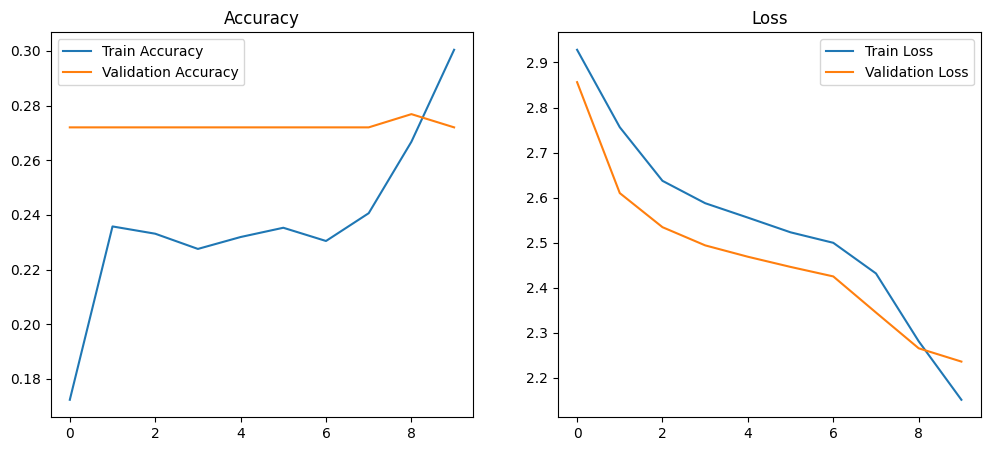

Top contributing words for similarity:
['trailer' 'hd' 'movie' '2018' 'disney']


In [ ]:
# Evaulate NN model
# Save and load model functionality - Persabella
results = model.evaluate([X_test_num, X_test_text], y_test)
print(f"NN Test Accuracy: {results[1]}")

model.save('youtube_recommendation_model.h5')

"""
loaded_model = tf.keras.models.load_model('youtube_recommendation_model.h5')

# Use the loaded model for evaluation or prediction
results = loaded_model.evaluate([X_test_num, X_test_text], y_test)

# Make predictions
predictions = loaded_model.predict([X_test_num, X_test_text])
"""

# Visualizing history for training evaluation - Persabella
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# this function takes a video index and returns top words that contribute most
# to the cosine similarity calculations -Persabella
def explain_cosine_similarity(video_index, top_n=5):
    vector = tfidf_matrix[video_index]
    word_contributions = vectorizer.inverse_transform(vector)[0]
    return word_contributions[:top_n]

print("Top contributing words for similarity:")
print(explain_cosine_similarity(random_video_index))



We were having issues with neural networks, specifically with the similarity results being perfect 1s or 99.9% (so, essentially 1). We were using cosine similarity to compute similarity scores, so we tried other methods (besides neural networks and cosine similarities) to see what we could get.

In [ ]:
# Dot-Product method NN - Jessica
def recommend_videos_nn(video_index, num_recommendations=10):
    # Generate the target embedding
    target_embedding = generate_embedding(
        np.expand_dims(X_text[video_index], axis=0),
        np.expand_dims(X_numerical[video_index], axis=0)
    )

    print(f"Recommendations for: {data.iloc[video_index]['title']}")  # Title of the target video

    similarities = []  # To store dot product similarities
    batch_size = 1000
    for i in range(0, len(X_text), batch_size):
        batch_embeddings = model.predict(
            [X_numerical[i:i + batch_size], X_text[i:i + batch_size]], verbose=0
        )
        # Compute dot product between the target and batch embeddings
        batch_similarities = np.dot(batch_embeddings, target_embedding.T).flatten()
        similarities.extend(batch_similarities)

    # Convert to numpy array for sorting
    similarity_scores = np.array(similarities)

    # Get indices of top recommendations (excluding the target video itself)
    similar_indices = similarity_scores.argsort()[::-1][1:num_recommendations + 1]
    recommendations = data.iloc[similar_indices][['title', 'views']].copy()
    recommendations['similarity_score'] = similarity_scores[similar_indices]

    # Format output like ML system
    print(recommendations)

    return recommendations

# Recommendations for a random video
random_video_index = random.randint(0, len(X_text) - 1)
recommendations_nn = recommend_videos_nn(random_video_index, num_recommendations=10)



Recommendations for: First Look at Nintendo Labo
                            title    views  similarity_score
16320                     Iceberg   124022          0.076561
19574                        Jack  1234544          0.076516
26153             So It Begins...   559561          0.076481
31952               Lift Yourself   656393          0.076478
17975              unboxing video   559257          0.076475
8434        Home for the Holidays    50722          0.076468
17789            Siri in the '80s    45052          0.076461
20774  ranking up your friendship   646634          0.076457
26584         Working as intended   165417          0.076453
5938               Map of Biology    30134          0.076452


As seen in the above code, I made a system using a neural network model by dot-product instead of cosine similartiy. Unfortunately, I still only got perfect 1s for our similarity scores.

-- Jessica

In [ ]:
#Recommendations by Euclidean Distance - Sloane
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
import time

start_time = time.time() #starts a timer so we can see how long it takes for the code to run

data['title_preprocessed'] = data['title'].apply(preprocess_text_simple) #load the preprocess
data = data.drop_duplicates(subset='title', keep='first')

vectorizer = TfidfVectorizer(stop_words='english')  #vectorize the titles
title_vectors = vectorizer.fit_transform(data['title_preprocessed'].apply(lambda x: ' '.join(x))).toarray()

distances = pairwise_distances(title_vectors, metric='euclidean')

similarities = 1 / (1 + distances)  #this converts distance to similarities

#recommendation function
def recommend_videos_by_title_euclidean(video_index, num_recommendations=10):
    sim_scores = list(enumerate(distances[video_index]))
    #sort from shortest distance to largest distance
    sim_scores = sorted(sim_scores, key=lambda x: x[1])
    sim_scores = sim_scores[1:num_recommendations + 1]
    video_indices = [i[0] for i in sim_scores]
    recommendations = data.iloc[video_indices][['title', 'views']].copy()
    recommendations['distance'] = [sim_scores[i][1] for i in range(len(sim_scores))]
    recommendations['similarity'] = 1 / (1 + recommendations['distance'])
    return recommendations[['title', 'views', 'distance', 'similarity']]


random_video_index = random.randint(0, len(data) - 1) #picks a random video
print("Euclidean Recommendations for:", data.iloc[random_video_index]['title'])


num_recommendations = 10
recommendations = recommend_videos_by_title_euclidean(random_video_index, num_recommendations)
end_time = time.time() #stops timer after the code completes recommendations
print(recommendations)
print()
print(f"Time taken: {end_time - start_time:.2f} seconds")


Euclidean Recommendations for: Behind The Sounds: That's Not Me
                                                   title    views  distance  \
12458                                      Where are we?    65182  1.000000   
26151                                      ME YOU YOU ME   879800  1.000000   
15869               How Horse Sounds are Made for Movies  2370802  1.100754   
2811                     Why Hold Music Sounds Worse Now   306872  1.140631   
12872    Nintendo Labo Isn't for Adults, and That's Okay   108184  1.176401   
27678  The 1940s Mermaid Show That's Still Pulling Cr...   183950  1.177106   
1415     The German Town That's Literally Breaking Apart   372127  1.179265   
7649     Making new sounds using artificial intelligence    63460  1.191730   
17610  Hear the Otherworldly Sounds of Skating on Thi...   360348  1.223854   
19600  Do Indians Know How Their English Accent Sound...    45902  1.231998   

       similarity  
12458    0.500000  
26151    0.500000  
15869 

I created a neural network that  calculates similarity scores using Euclidean distance. It actually works, and it appropriately calculates the similarity between the titles!

-- Sloane

In [ ]:
# NN with Manhattan Distance - Persabella
def recommend_videos_nn(video_index, num_recommendations=10):
    # Generate the target embedding
    target_embedding = generate_embedding(
        np.expand_dims(X_text[video_index], axis=0),
        np.expand_dims(X_numerical[video_index], axis=0)
    )

    print(f"Recommendations for: {data.iloc[video_index]['title']}")  # Title of the target video

    similarities = []  # Store Manhattan distance similarities
    batch_size = 1000
    for i in range(0, len(X_text), batch_size):
        batch_embeddings = model.predict(
            [X_numerical[i:i + batch_size], X_text[i:i + batch_size]], verbose=0
        )
        # Compute Manhattan distance and convert to similarity scores
        batch_distances = np.sum(np.abs(batch_embeddings - target_embedding), axis=1)
        batch_similarities = 1 / (1 + batch_distances)  # Convert distances to similarity scores
        similarities.extend(batch_similarities)

    # Convert to numpy array for sorting
    similarity_scores = np.array(similarities)

    # Get indices of top recommendations (excluding the target video itself)
    similar_indices = similarity_scores.argsort()[::-1][1:num_recommendations + 1]
    recommendations = data.iloc[similar_indices][['title', 'views']].copy()
    recommendations['similarity_score'] = similarity_scores[similar_indices]

    # Print recommendations in the requested format
    print(recommendations)

    return recommendations

# Generate recommendations for a random video
random_video_index = random.randint(0, len(X_text) - 1)
recommendations_nn = recommend_videos_nn(random_video_index, num_recommendations=10)


Recommendations for: björk - the gate deconstructed
                                                   title     views  \
10001   Justin Timberlake - INTRODUCING MAN OF THE WOODS    725305   
1220                     American Influencer Awards 2017     66888   
27955               Night School - Official Trailer (HD)   2288833   
5000            Migos, Nicki Minaj, Cardi B - MotorSport   4514272   
626                              Mariah Carey - The Star    177348   
22993  Khalid - Fast Car (Tracy Chapman cover) in the...    549934   
26750        Westworld Season 2 | Official Trailer | HBO   2108246   
29951               Ariana Grande - No Tears Left To Cry  15873034   
5331   Michael Bublé - White Christmas (ft. Shania Tw...    190152   
1805                         Sia - Santa's Coming For Us    684778   

       similarity_score  
10001          0.990063  
1220           0.988379  
27955          0.987437  
5000           0.987162  
626            0.986748  
22993          0.9850

When I tried building a neural network with using Manhattan distance to calculate the similarity scores, I only got perfect 1s or 0.99s.

--Persabella

**Results From Our 3 Tests**

Between Euclidean distance, Dot-product, and Manhattan distance, Euclidean distance was the only neural network method we tried where we got results that were not perfect 1s or 99.9%.

===================================================================================================================

I was still curious as to why cosine similarity was giving us difficulty. So I made a dummy version of our project (as seen below) to experiment with.

-- Sloane

In [ ]:
#dummy NN to recommend videos based on titles - Sloane
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np


video_titles = [                                                                #created a sample list of video titles using 3 separate
    "Learn Python Programming",                                                 #languages: Java, Python, and Swift. Each language also
    "Introduction to Machine Learning",                                         #focuses on a specific task. Java focuses on game dev., Python
    "Advanced Deep Learning Techniques",                                        #focuses on machine learning, and Swift focuses on app development.
    "Data Science for Beginners",
    "Understanding Artificial Intelligence",
    "Python for Data Analysis",
    "Getting Started with Game Development in Java",                            #i used a list to implemenet these instead of referencing a csv file
    "Building a Simple 2D Game in Java: A Beginner’s Guide",                    #for time purposes and to avoid any issues with referencing.
    "Java Game Development: Creating a Basic Platformer",
    "Top 10 Game Development Libraries for Java",
    "Getting Started with Swift for iOS App Development",
    "Building a To-Do List App with SwiftUI",
    "Understanding MVVM Architecture in Swift",
    "Creating Beautiful Animations in SwiftUI",
    "Core Data Basics: Building a Notes App in Swift",
    "How to Implement Dark Mode in Your Swift Apps",
]


tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")
model = AutoModel.from_pretrained("sentence-transformers/all-MiniLM-L6-v2")               #using BERT for the NN

#function to embed titles
def embed_titles(titles):
    tokens = tokenizer(titles, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        embeddings = model(**tokens)
    return embeddings.last_hidden_state.mean(dim=1)

#generate embeddings for video titles
title_embeddings = embed_titles(video_titles).numpy()

#compute cosine similarity between embeddings
cos_sim_nn = cosine_similarity(title_embeddings, title_embeddings)

#function to recommend videos using neural embeddings
def display_similarity_nn(input_title, video_titles, embeddings, top_n=3):
    if input_title not in video_titles:
        return "Title not found in the dataset."

    idx = video_titles.index(input_title)
    similarity_scores = list(enumerate(cos_sim_nn[idx]))
    sorted_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    print(f"Input Title: '{input_title}'")
    for i, score in sorted_scores[1 : top_n + 1]:  #exclude the input itself
        print(f"  - Similar to '{video_titles[i]}': {score:.2f}")

#randomly select a title and display recommendations
input_title = random.choice(video_titles)
display_similarity_nn(input_title, video_titles, title_embeddings)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Input Title: 'Building a To-Do List App with SwiftUI'
  - Similar to 'Core Data Basics: Building a Notes App in Swift': 0.64
  - Similar to 'Getting Started with Swift for iOS App Development': 0.61
  - Similar to 'Creating Beautiful Animations in SwiftUI': 0.57


The dummy neural networks code that I made is able to appropriately recommend YouTube videos and correctly calculate the similarity scores. I believe there may be several reasons why our main code was unable to do this.


1.   Overfitting - The train loss on our neural network model was very low, which is causing overfitting to happen.
2.   Referencing - Our dataset we were using was much bigger than the simple list I implemented in the dummy code, and I believe with the size of the dataset and the few complications we faced when trying to refernece it could have had an impact on the output of our code.


Overall, we were able to get a working neural network with Euclidean distance, and we can work on getting our cosine similartiy to function correctly in the future!

--Sloane



Now that we have a properly functioning code for a neural network,